# Import the YOLOv8 pretrained model

In [1]:
from ultralytics import YOLO
from matplotlib import pyplot as plt
from PIL import Image
PYTORCH_NO_CUDA_MEMORY_CACHING=1

from pathlib import Path
import matplotlib.pyplot as plt
import cv2
import torch
from torch import cuda
import os
import numpy as np
import random
from PIL import Image
import matplotlib.colors as mcolors
import numpy.ma as ma
import json
np.set_printoptions(precision=15)

# Ensure deterministic behavior (cannot control everything though)
torch.backends.cudnn.deterministic = True
random.seed(42)
np.random.seed(42)
torch.manual_seed(42)
torch.cuda.manual_seed_all(42)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

from typing import Any, Dict, Generator,List
import matplotlib.pyplot as plt
import numpy as np
# !nvidia-smi

**hyperparameters docs: https://docs.ultralytics.com/usage/cfg/#train**


image 1/1 /workspace/raid/OM_DeepLearning/XMM_OM_code_git/../XMM_OM_dataset/zscaled_512_stretched/S0005010301_L.png: 800x800 4 read-out-streaks, 1 smoke-ring, 8 stars, 2 star-loops, 6.5ms
Speed: 8.3ms preprocess, 6.5ms inference, 2.6ms postprocess per image at shape (1, 3, 800, 800)
torch.Size([15, 800, 800])
15


dict_values(['central-ring', 'cluster', 'galaxy', 'nebula', 'other', 'read-out-streak', 'scattered-light-outside-FOV', 'smoke-ring', 'star', 'star-loop'])

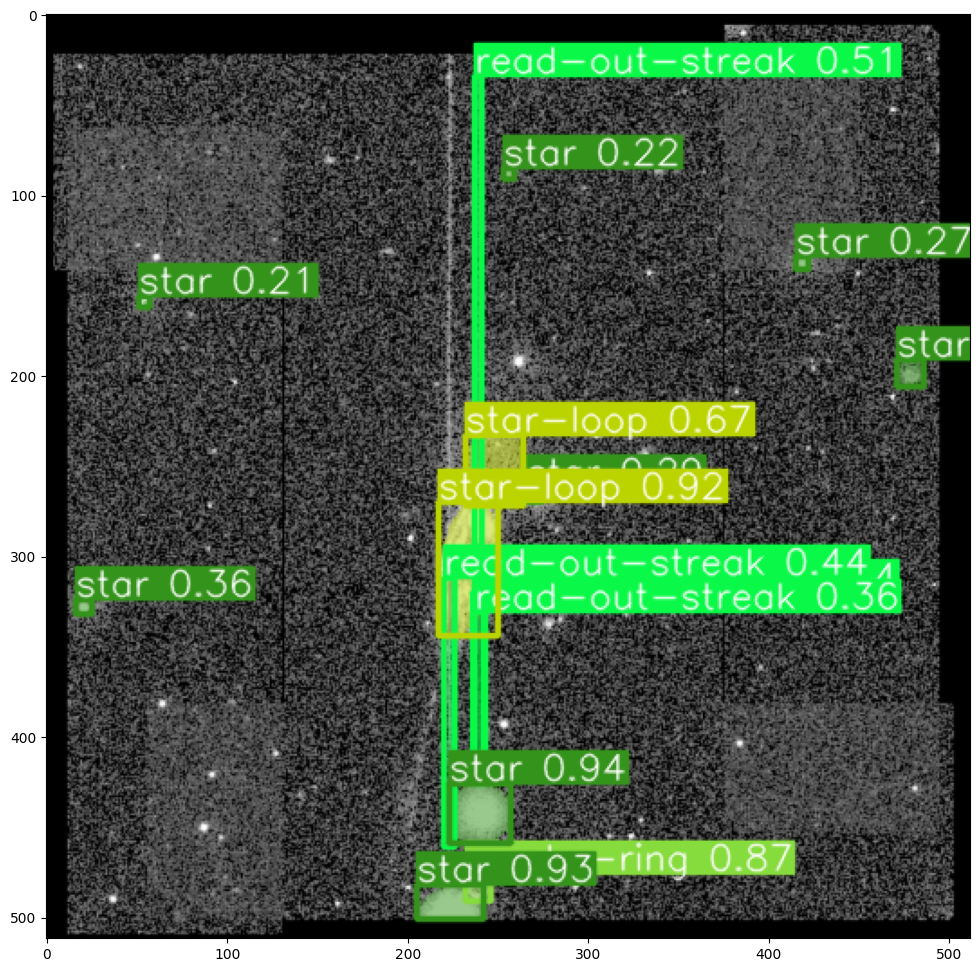

In [2]:
def show_masks(masks, ax, random_color=False):
    for mask in masks:
        if random_color:
            color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
        else:
                color = np.array([30/255, 144/255, 255/255, 0.6])
        h, w = mask.shape[-2:]
        mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
        ax.imshow(mask_image)
        
# # Instance
# model = YOLO('yolov8n-seg.yaml')  # build a new model from YAML
# model = YOLO('yolov8n-seg.pt')  # Transfer the weights from a pretrained model (recommended for training)
# # define number of classes based on YAML
# import yaml
# with open("./xmm_om_images_v4-contrast-512-5-7-YOLO/data.yaml", 'r') as stream:
#     num_classes = str(yaml.safe_load(stream)['nc'])
# print('num_classes', num_classes)
# # wandb project
# project = "yolov8-segm-fine-tuning"
# # subdirectory
# name = "200_epochs-m"
# # Train the model
# results = model.train(data='./xmm_om_images_v4-contrast-512-5-7-YOLO/data.yaml',
#                       project=project,
#                       name=name,
#                       epochs=200,
#                       patience=0, #I am setting patience=0 to disable early stopping.
#                       batch=4,
#                       imgsz=512,
#                       # augment=True, 
#                       # input custom augm and set the augm to None herte
#                       # freeze layers
#                       # try without mosaics
#                       # 
#                      )
yolov8_pretrained_model = YOLO('./yolov8-segm-fine-tuning/200_epochs-2/weights/best.pt')
new_image = '../XMM_OM_dataset/zscaled_512_stretched/S0005010301_L.png'
new_results = yolov8_pretrained_model.predict(new_image, conf=0.2)  #Adjust conf threshold
new_result_array = new_results[0].plot()
plt.figure(figsize=(12, 12))
plt.imshow(new_result_array)
new_result = new_results[0]
# print(new_result.masks.xyn)
extracted_masks = new_result.masks.data
print(extracted_masks.shape)
masks_array = extracted_masks.cpu().numpy()
print(len(masks_array))
# plt.imshow(masks_array[0])
# plt.show()
# plt.close()
class_names = new_result.names.values()
class_names

In [3]:
extracted_masks.shape

torch.Size([15, 800, 800])

In [4]:
# Extract the boxes, which likely contain class IDs
detected_boxes = new_result.boxes.data
# Extract class IDs from the detected boxes
class_labels = detected_boxes[:, -1].int().tolist()
# Initialize a dictionary to hold masks by class
masks_by_class = {name: [] for name in new_result.names.values()}

# Iterate through the masks and class labels
for mask, class_id in zip(extracted_masks, class_labels):
    class_name = new_result.names[class_id]  # Map class ID to class name
    masks_by_class[class_name].append(mask.cpu().numpy())

In [5]:
detected_boxes

tensor([[2.2387e+02, 4.2614e+02, 2.5745e+02, 4.5978e+02, 9.3636e-01, 8.0000e+00],
        [2.0599e+02, 4.8289e+02, 2.4281e+02, 5.0186e+02, 9.2654e-01, 8.0000e+00],
        [2.1774e+02, 2.7099e+02, 2.5051e+02, 3.4452e+02, 9.1610e-01, 9.0000e+00],
        [2.3240e+02, 4.7692e+02, 2.4660e+02, 4.9146e+02, 8.7009e-01, 7.0000e+00],
        [2.3238e+02, 2.3310e+02, 2.6450e+02, 2.7204e+02, 6.7484e-01, 9.0000e+00],
        [4.7153e+02, 1.9168e+02, 4.8678e+02, 2.0631e+02, 6.2234e-01, 8.0000e+00],
        [2.3740e+02, 3.4649e+01, 2.4170e+02, 2.9789e+02, 5.1349e-01, 5.0000e+00],
        [2.2095e+02, 3.1228e+02, 2.2643e+02, 4.6132e+02, 4.3571e-01, 5.0000e+00],
        [1.6866e+01, 3.2475e+02, 2.5617e+01, 3.3252e+02, 3.6229e-01, 8.0000e+00],
        [2.3771e+02, 3.3126e+02, 2.4319e+02, 4.2602e+02, 3.6030e-01, 5.0000e+00],
        [2.3659e+02, 3.2080e+02, 2.4205e+02, 4.2419e+02, 3.3974e-01, 5.0000e+00],
        [2.6651e+02, 2.6262e+02, 2.7475e+02, 2.7029e+02, 2.8758e-01, 8.0000e+00],
        [4.1599e

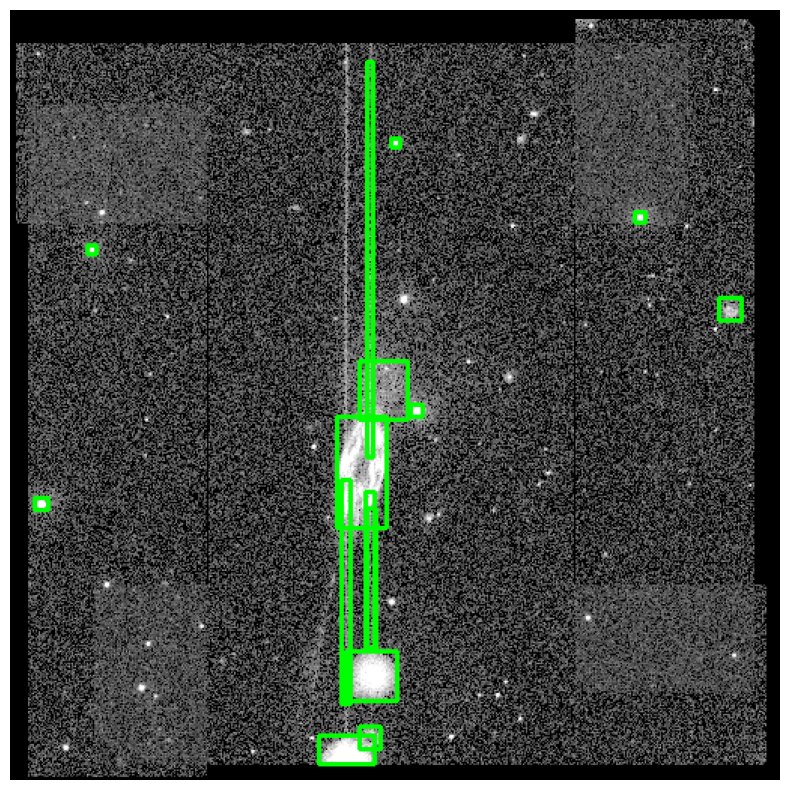

In [6]:
import cv2

image = image = cv2.imread(new_image)

for box in detected_boxes:
    # Convert tensor to numpy array for easier handling
    box = box.cpu().numpy()
    
    # Extract coordinates and dimensions
    # Adjust indices if your format is different
    x, y, width, height = int(box[0]), int(box[1]), int(box[2])-int(box[0]), int(box[3])-int(box[1])
    
    # Calculate the bottom-right corner
    end_x, end_y = x + width, y + height
    
    # Draw the rectangle on the image
    image = cv2.rectangle(image, (x, y), (end_x, end_y), (0, 255, 0), 2)  # Green color

# Convert BGR image to RGB for displaying with matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image
plt.figure(figsize=(10, 10))
plt.imshow(image_rgb)
plt.axis('off')  # Hide the axis
plt.show()

In [7]:
PYTORCH_NO_CUDA_MEMORY_CACHING=1

from pathlib import Path
import matplotlib.pyplot as plt
import cv2
import torch
from torch import cuda
import os
import numpy as np
import random
from PIL import Image
import matplotlib.colors as mcolors
import numpy.ma as ma
import json
np.set_printoptions(precision=15)

# Ensure deterministic behavior (cannot control everything though)
torch.backends.cudnn.deterministic = True
random.seed(42)
np.random.seed(42)
torch.manual_seed(42)
torch.cuda.manual_seed_all(42)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

# !nvidia-smi


# import argparse
# import ast
# import torch
# from PIL import Image
# import cv2
# import os
# import sys

# sys.path.append('/workspace/raid/OM_DeepLearning/MobileSAM-master/MobileSAMv2/')

# from mobilesamv2.promt_mobilesamv2 import ObjectAwareModel
# from mobilesamv2 import sam_model_registry, SamPredictor
# from typing import Any, Dict, Generator,List
# import matplotlib.pyplot as plt
# import numpy as np

In [8]:
dir_ = '/workspace/raid/OM_DeepLearning/MobileSAM-master/MobileSAMv2/'

def show_anns(anns):
    if len(anns) == 0:
        return
    ax = plt.gca()
    ax.set_autoscale_on(False)
    img = np.ones((anns.shape[1], anns.shape[2], 4))
    img[:,:,3] = 0
    for ann in range(anns.shape[0]):
        m = anns[ann].bool()
        m=m.cpu().numpy()
        color_mask = np.concatenate([np.random.random(3), [1]])
        img[m] = color_mask
    ax.imshow(img)

def batch_iterator(batch_size: int, *args) -> Generator[List[Any], None, None]:
    assert len(args) > 0 and all(
        len(a) == len(args[0]) for a in args
    ), "Batched iteration must have inputs of all the same size."
    n_batches = len(args[0]) // batch_size + int(len(args[0]) % batch_size != 0)
    for b in range(n_batches):
        yield [arg[b * batch_size : (b + 1) * batch_size] for arg in args]

encoder_path={'efficientvit_l2':dir_+'weight/l2.pt',
            'tiny_vit':dir_+'weight/mobile_sam.pt',
            'sam_vit_h':dir_+'weight/sam_vit_h.pt',}

In [9]:
import sys
import PIL
from PIL import Image

sys.path.append('/workspace/raid/OM_DeepLearning/MobileSAM-fine-tuning/')
from ft_mobile_sam import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor

mobile_sam_checkpoint = "/workspace/raid/OM_DeepLearning/MobileSAM-fine-tuning/weights/mobile_sam.pt"
device = "cuda:6" if torch.cuda.is_available() else "cpu"
print("device:", device)

mobile_sam_model = sam_model_registry["vit_t"](checkpoint=mobile_sam_checkpoint)
mobile_sam_model.to(device);
images_dir = '../XMM_OM_dataset/zscaled_512_stretched/'
image_files= os.listdir(images_dir)
predictor = SamPredictor(mobile_sam_model)

/workspace/raid/OM_DeepLearning/MobileSAM-fine-tuning/ft_mobile_sam/modeling/tiny_vit_sam.py:656: UserWarning: Overwriting tiny_vit_5m_224 in registry with ft_mobile_sam.modeling.tiny_vit_sam.tiny_vit_5m_224. This is because the name being registered conflicts with an existing name. Please check if this is not expected.
  return register_model(fn_wrapper)
/workspace/raid/OM_DeepLearning/MobileSAM-fine-tuning/ft_mobile_sam/modeling/tiny_vit_sam.py:656: UserWarning: Overwriting tiny_vit_11m_224 in registry with ft_mobile_sam.modeling.tiny_vit_sam.tiny_vit_11m_224. This is because the name being registered conflicts with an existing name. Please check if this is not expected.
  return register_model(fn_wrapper)
/workspace/raid/OM_DeepLearning/MobileSAM-fine-tuning/ft_mobile_sam/modeling/tiny_vit_sam.py:656: UserWarning: Overwriting tiny_vit_21m_224 in registry with ft_mobile_sam.modeling.tiny_vit_sam.tiny_vit_21m_224. This is because the name being registered conflicts with an existing na

device: cuda:6


***** S0655571401_L.png

image 1/1 /workspace/raid/OM_DeepLearning/XMM_OM_code_git/../XMM_OM_dataset/zscaled_512_stretched/S0655571401_L.png: 800x800 1 central-ring, 7 stars, 2 star-loops, 6.9ms
Speed: 3.1ms preprocess, 6.9ms inference, 1.6ms postprocess per image at shape (1, 3, 800, 800)
boxes tensor([[513.6201, 306.2848, 593.0078, 415.4997],
        [466.2249, 466.8021, 528.7684, 521.1902],
        [536.5369, 488.4456, 771.3326, 567.5121],
        [442.9213, 696.9062, 457.3217, 711.5408],
        [529.1722, 662.6244, 540.5172, 673.7334],
        [339.5902, 531.7054, 351.4198, 543.6348],
        [398.7734, 371.7757, 413.0212, 386.4380],
        [636.9598, 720.7483, 650.0099, 733.5333],
        [624.7129, 370.0325, 636.1733, 381.0920],
        [551.6885, 699.9186, 563.7447, 711.9451]], device='cuda:6', dtype=torch.float64)


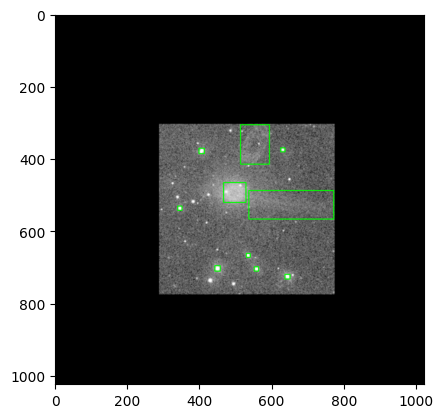

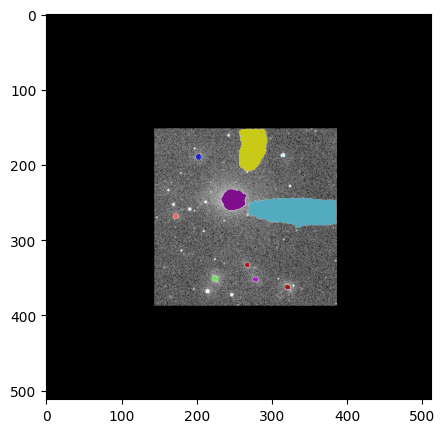

***** S0893811101_V.png

image 1/1 /workspace/raid/OM_DeepLearning/XMM_OM_code_git/../XMM_OM_dataset/zscaled_512_stretched/S0893811101_V.png: 800x800 1 central-ring, 1 other, 15 stars, 4 star-loops, 6.6ms
Speed: 3.4ms preprocess, 6.6ms inference, 1.7ms postprocess per image at shape (1, 3, 800, 800)
boxes tensor([[438.5732, 608.2596, 501.9825, 752.3413],
        [467.8492, 469.0912, 524.4073, 523.1364],
        [516.9171, 542.8703, 595.1479, 588.6469],
        [453.0407, 559.6024, 520.8729, 618.7294],
        [306.8757, 737.0519, 360.5894, 756.1712],
        [536.6660, 719.2817, 554.2040, 736.5994],
        [587.8904, 663.5164, 601.6609, 676.6908],
        [694.3041, 445.5283, 713.4334, 466.4958],
        [340.9574, 681.9611, 358.8043, 695.4777],
        [405.9276, 556.7228, 423.3214, 575.5206],
        [462.0451, 353.4814, 481.1481, 371.8581],
        [719.0544, 494.6663, 733.0516, 506.9780],
        [484.9534, 447.0209, 536.6363, 480.6710],
        [529.8333, 411.4695, 541.2204, 421.

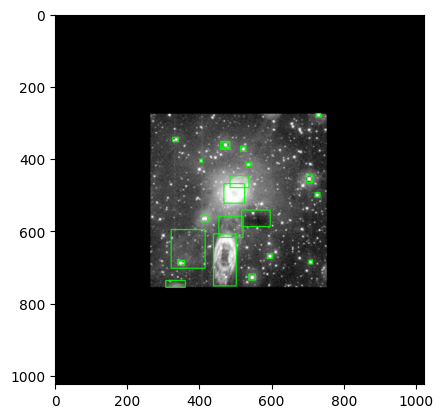

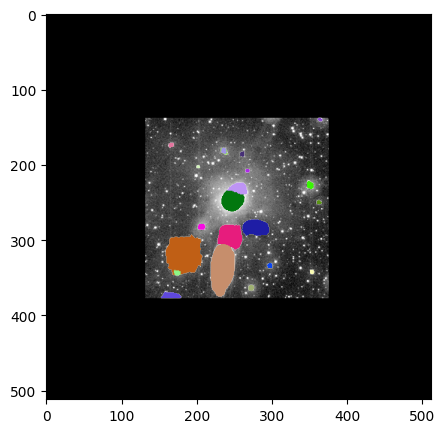

***** S0804790401_M.png

image 1/1 /workspace/raid/OM_DeepLearning/XMM_OM_code_git/../XMM_OM_dataset/zscaled_512_stretched/S0804790401_M.png: 800x800 2 stars, 6.7ms
Speed: 3.1ms preprocess, 6.7ms inference, 1.7ms postprocess per image at shape (1, 3, 800, 800)
boxes tensor([[530.0731, 530.6389, 543.8058, 543.1191],
        [293.7460, 498.1259, 305.5791, 509.2958]], device='cuda:6', dtype=torch.float64)


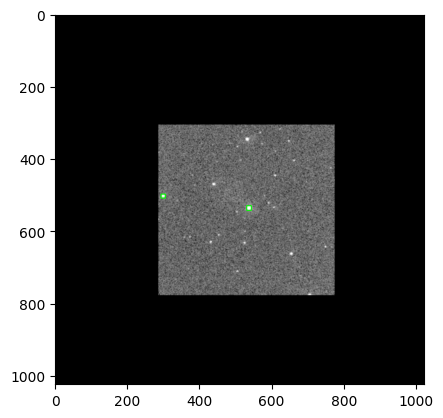

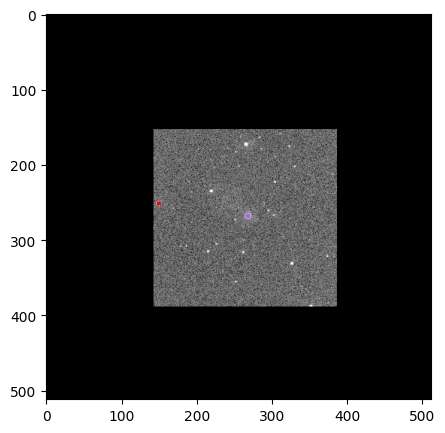

***** S0044350101_L.png

image 1/1 /workspace/raid/OM_DeepLearning/XMM_OM_code_git/../XMM_OM_dataset/zscaled_512_stretched/S0044350101_L.png: 800x800 1 central-ring, 1 galaxy, 6 stars, 1 star-loop, 6.6ms
Speed: 3.0ms preprocess, 6.6ms inference, 1.6ms postprocess per image at shape (1, 3, 800, 800)
boxes tensor([[504.4052, 512.5765, 572.3043, 559.0519],
        [452.2303, 463.8329, 532.0537, 521.1385],
        [465.6516, 576.2238, 487.2221, 592.7241],
        [272.1514, 927.3834, 286.9072, 941.9056],
        [749.7041, 155.3903, 768.8344, 167.4647],
        [199.6199, 261.9334, 211.9023, 273.6873],
        [480.1443, 843.2629, 499.5649, 859.1965],
        [508.5426, 512.5534, 573.4641, 557.3038],
        [481.5603, 382.4239, 494.1860, 396.0041]], device='cuda:6', dtype=torch.float64)


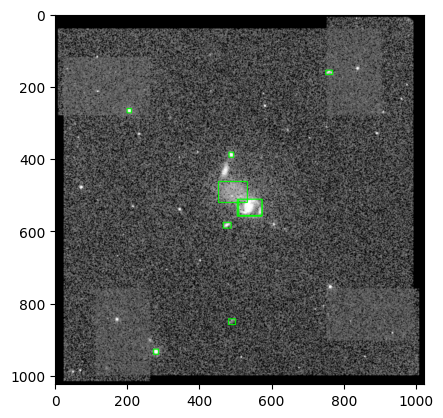

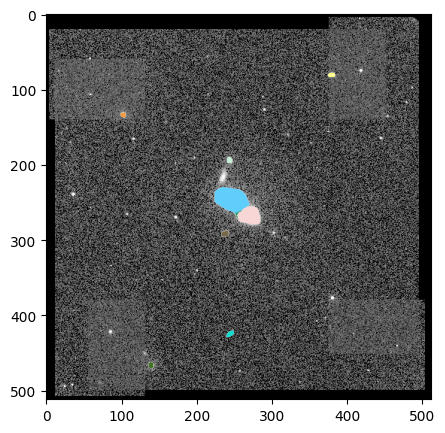

***** S0801800201_L.png

image 1/1 /workspace/raid/OM_DeepLearning/XMM_OM_code_git/../XMM_OM_dataset/zscaled_512_stretched/S0801800201_L.png: 800x800 1 central-ring, 1 other, 5 read-out-streaks, 2 smoke-rings, 14 stars, 1 star-loop, 6.6ms
Speed: 3.2ms preprocess, 6.6ms inference, 1.7ms postprocess per image at shape (1, 3, 800, 800)
boxes tensor([[ 699.5684,  592.4472,  958.8481,  841.0409],
        [ 737.7968,  679.1361,  805.8776,  745.6225],
        [ 814.2306,  740.8711,  845.8594,  770.8898],
        [ 464.2765,  464.7248,  531.2456,  522.6114],
        [ 671.8181,  369.1455,  703.2553,  396.8914],
        [ 766.5617,  746.6230,  777.1975, 1004.1790],
        [ 765.5748,   73.0316,  778.3636,  685.5498],
        [ 955.5217,  606.6555,  970.6925,  620.8555],
        [ 643.7540,  390.0432,  668.1438,  412.8171],
        [ 944.0650,  897.3386,  960.0572,  912.0553],
        [ 380.9233,  777.4188,  393.4984,  789.3251],
        [ 647.2409,  439.8541,  658.7327,  742.1827],
        [ 6

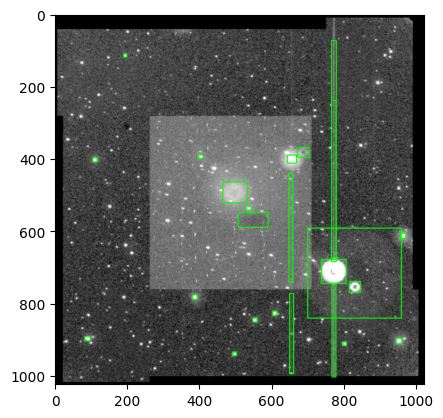

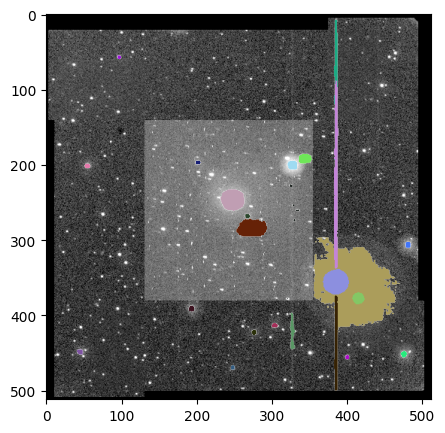

***** S0872590101_M.png

image 1/1 /workspace/raid/OM_DeepLearning/XMM_OM_code_git/../XMM_OM_dataset/zscaled_512_stretched/S0872590101_M.png: 800x800 1 other, 1 star, 6.6ms
Speed: 3.0ms preprocess, 6.6ms inference, 1.6ms postprocess per image at shape (1, 3, 800, 800)
boxes tensor([[505.9103, 539.6382, 586.7620, 598.3358],
        [406.8445, 665.6642, 419.7294, 678.8126]], device='cuda:6', dtype=torch.float64)


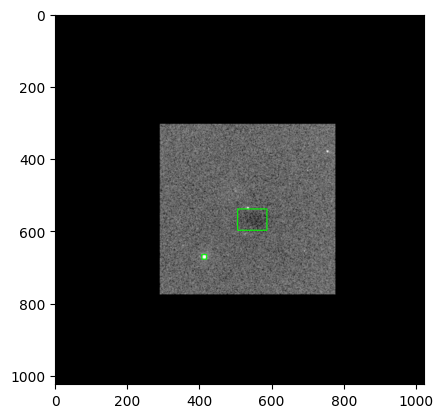

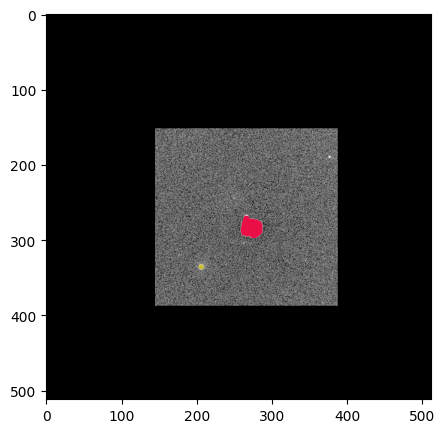

***** S0761100201_B.png

image 1/1 /workspace/raid/OM_DeepLearning/XMM_OM_code_git/../XMM_OM_dataset/zscaled_512_stretched/S0761100201_B.png: 800x800 2 others, 5 read-out-streaks, 5 smoke-rings, 42 stars, 8 star-loops, 6.6ms
Speed: 3.0ms preprocess, 6.6ms inference, 2.0ms postprocess per image at shape (1, 3, 800, 800)
boxes tensor([[7.3187e+02, 7.1505e+02, 7.6024e+02, 7.4462e+02],
        [6.4978e+02, 6.0518e+02, 7.3804e+02, 6.6433e+02],
        [2.4981e+02, 4.7119e+02, 3.1640e+02, 5.3860e+02],
        [5.7725e+02, 4.4617e+02, 6.9876e+02, 5.0893e+02],
        [0.0000e+00, 3.6940e+02, 2.3433e+01, 3.9720e+02],
        [2.2696e+02, 4.9113e+02, 2.5614e+02, 5.1852e+02],
        [4.6586e+02, 4.6512e+02, 5.5146e+02, 5.3542e+02],
        [6.3747e+02, 5.3719e+02, 7.0191e+02, 5.8265e+02],
        [0.0000e+00, 9.4812e+02, 9.4553e+01, 1.0239e+03],
        [5.9848e+01, 3.6976e+02, 1.2394e+02, 4.3571e+02],
        [1.9163e+02, 3.0345e+02, 2.0802e+02, 3.1839e+02],
        [6.9091e+02, 6.7994e+02, 7.

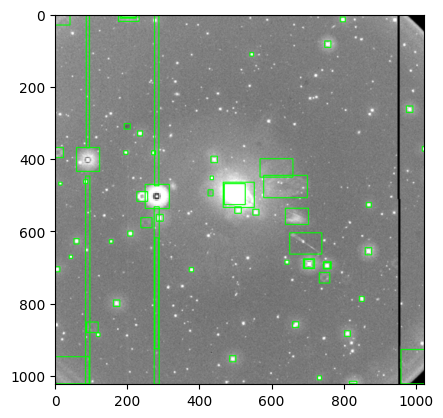

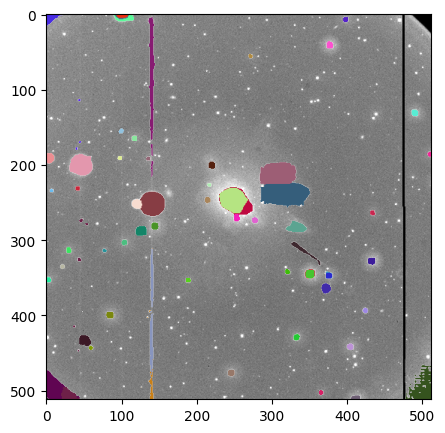

***** S0822400101_M.png

image 1/1 /workspace/raid/OM_DeepLearning/XMM_OM_code_git/../XMM_OM_dataset/zscaled_512_stretched/S0822400101_M.png: 800x800 1 other, 2 stars, 6.6ms
Speed: 3.0ms preprocess, 6.6ms inference, 1.6ms postprocess per image at shape (1, 3, 800, 800)
boxes tensor([[518.6682, 542.1493, 585.6445, 587.1014],
        [217.0420, 197.3591, 233.0208, 211.7427],
        [288.4251, 171.4034, 299.8181, 182.3505]], device='cuda:6', dtype=torch.float64)


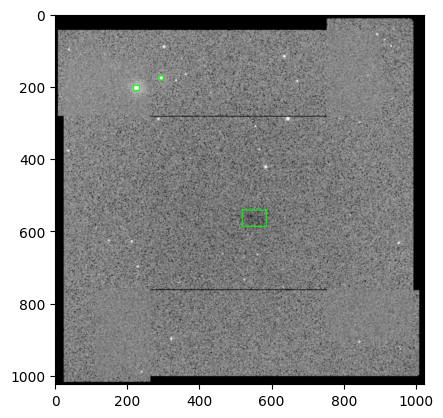

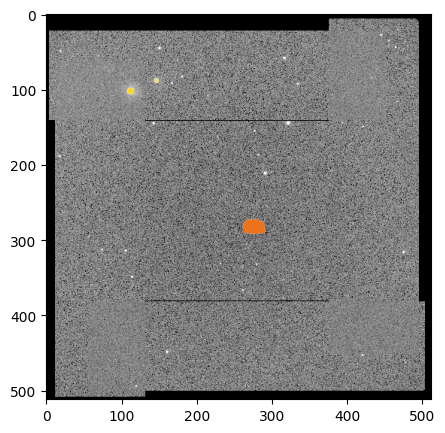

***** S0761100201_S.png

image 1/1 /workspace/raid/OM_DeepLearning/XMM_OM_code_git/../XMM_OM_dataset/zscaled_512_stretched/S0761100201_S.png: 800x800 2 stars, 6.6ms
Speed: 3.1ms preprocess, 6.6ms inference, 1.6ms postprocess per image at shape (1, 3, 800, 800)
boxes tensor([[548.2305, 543.2452, 559.8196, 554.3234],
        [841.0727, 780.9209, 853.7696, 794.8050]], device='cuda:6', dtype=torch.float64)


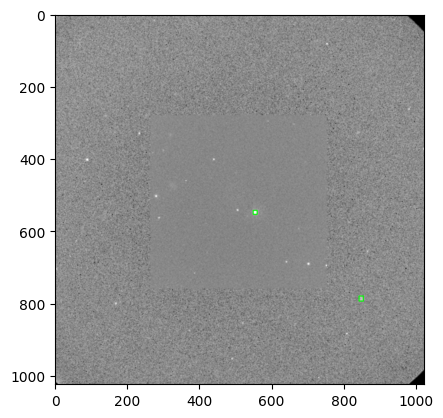

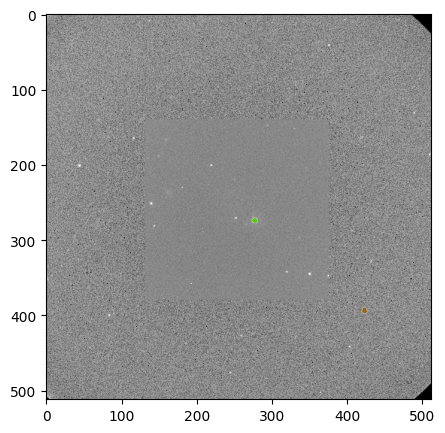

***** S0411780301_U.png

image 1/1 /workspace/raid/OM_DeepLearning/XMM_OM_code_git/../XMM_OM_dataset/zscaled_512_stretched/S0411780301_U.png: 800x800 1 central-ring, 3 stars, 6.6ms
Speed: 3.0ms preprocess, 6.6ms inference, 1.7ms postprocess per image at shape (1, 3, 800, 800)
boxes tensor([[463.7955, 464.9324, 531.0649, 523.5905],
        [528.6331, 523.4884, 543.1879, 537.8870],
        [381.1908, 390.1351, 397.6813, 413.4546],
        [655.5975, 592.0156, 665.1420, 601.6677]], device='cuda:6', dtype=torch.float64)


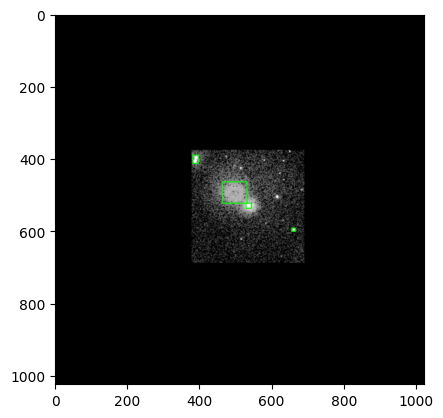

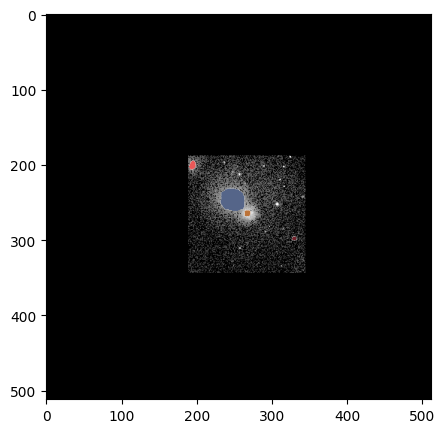

In [13]:
for image_name in image_files[:1]:
        print('*****', image_name)
        image = cv2.imread(images_dir + image_name)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        obj_results = yolov8_pretrained_model.predict(images_dir + image_name, conf=0.2)  #Adjust conf threshold
        predictor.set_image(image)
        input_boxes1 = obj_results[0].boxes.xyxy
        input_boxes = input_boxes1.cpu().numpy()
        input_boxes = predictor.transform.apply_boxes(input_boxes, predictor.original_size)
        input_boxes = torch.from_numpy(input_boxes).to(device)
        sam_mask=[]
        image_embedding=predictor.features
        prompt_embedding=mobile_sam_model.prompt_encoder.get_dense_pe()

        yolo_masks = obj_results[0].masks.data

        for (boxes,) in batch_iterator(320, input_boxes): 
            with torch.no_grad():
                print('boxes', boxes)
                # Create a black image of size 1024x1024
                image1 = cv2.resize(image, (1024, 1024))
                
                for bbox in boxes:
                    # Each bbox is a tuple or list in the format (x1, y1, x2, y2)
                    x1, y1, x2, y2 = bbox.detach().cpu().numpy()
                    x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
                
                    # Draw rectangle (bounding box) on the image
                    cv2.rectangle(image1, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Green rectangle with thickness 2
                
                # Convert the BGR image to RGB
                image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
                
                # Display the image
                plt.imshow(image1)
                plt.show()
                plt.close()

                image_embedding=image_embedding[0:boxes.shape[0],:,:,:]
                prompt_embedding=prompt_embedding[0:boxes.shape[0],:,:,:]
                sparse_embeddings, dense_embeddings = mobile_sam_model.prompt_encoder(
                    points=None,
                    boxes=boxes,
                    masks=None,)
                low_res_masks, _ = mobile_sam_model.mask_decoder(
                    image_embeddings=image_embedding,
                    image_pe=prompt_embedding,
                    sparse_prompt_embeddings=sparse_embeddings,
                    dense_prompt_embeddings=dense_embeddings,
                    multimask_output=False,
                )
                low_res_masks=predictor.model.postprocess_masks(low_res_masks, predictor.input_size, predictor.original_size)
                sam_mask_pre = (low_res_masks > mobile_sam_model.mask_threshold)*1.0
                sam_mask.append(sam_mask_pre.squeeze(1))
        sam_mask=torch.cat(sam_mask)
        # print(sam_mask.shape)
        annotation = sam_mask
        areas = torch.sum(annotation, dim=(1, 2))
        sorted_indices = torch.argsort(areas, descending=True)
        show_img = annotation[sorted_indices]
        plt.figure(figsize=(5,5))
        background=image
        plt.imshow(background)
        show_anns(show_img)
        plt.show() 
        # plt.savefig("{}".format(output_dir+image_name), bbox_inches='tight', pad_inches = 0.0) 
        plt.close()

In [16]:
yolo_masks.shape

torch.Size([4, 800, 800])